In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"
import inspect
import logging
import os
import pandas as pd
from csrank.util import setup_logging, print_dictionary
from result_script import *
from csrank.experiments import OBJECT_RANKERS, OR_MODELS
from csrank.constants import OBJECT_RANKING
import numpy as np
import re
import string

Using TensorFlow backend.
/home/prithagupta/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
DIR_PATH = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
log_path = os.path.join(DIR_PATH, 'logs', 'results_or.log')
FOLDER = "journalresults"
latex_path = os.path.join(DIR_PATH, FOLDER, 'object_rankers.tex')
df_path_combined = os.path.join(DIR_PATH, FOLDER , "ObjectRankers.csv")

setup_logging(log_path=log_path, level=logging.ERROR)
logger = logging.getLogger('ResultParsing')
datasets = ['synthetic_or', 'tag_genome_or', 'letor_or',  'sushi']

learning_problem = OBJECT_RANKING
learning_model =  learners_map[learning_problem]
models_dict = dict(zip(OBJECT_RANKERS, OR_MODELS))

In [3]:
import re
def get_val(val):
    vals =  [float(x) for x in re.findall(r"[-+]?\d*\.\d+|\d+", val)]
    if len(vals)==1:
        x = [vals[0], vals[0]-0.0]
    else:
        x = [vals[0], vals[0] - vals[1]]
    return x
def create_final_result(dataset, dataset_function=get_combined_results ,latex_row=False):
    df_full = dataset_function(dataset, logger, learning_problem, latex_row=latex_row)
    data = []
    for dataset, df in df_full.groupby(['Dataset']):
        for m in OBJECT_RANKERS:
            row = df[df[learning_model].str.contains(m)].values
            onerow = None
            if len(row) > 1:
                if dataset_function==get_combined_results:
                    values = np.array([get_val(val[2]) for val in row])
                else:
                    values = np.array([[val[2], val[2] - val[7]] for val in row])
                maxi = np.where(values[:,0] == values[:,0][np.argmax(values[:,0])])[0][0]
                logger.error("dataset {} model {}, vals {}, maxi {}".format(dataset, row[:, 1], values, maxi))
                row = row[maxi]
                row[1] = models_dict[m]
                onerow = row

            elif len(row)==1:
                row[0][1] = models_dict[m]
                onerow = row[0]
            if onerow is not None:
                onerow[0] = get_dataset_name(onerow[0])
                data.append(onerow)
    columns = df_full.columns
    dataframe = pd.DataFrame(data, columns=columns)
    dataframe = dataframe.sort_values(by=[columns[0], columns[2]], ascending=[True, False])
    return dataframe

In [4]:
d = datasets[-2]
df = create_final_result(d, latex_row=False)
df = df.sort_values(by=['Dataset','KendallsTau'], ascending=[True,False])
df

,Dataset,Ranker,KendallsTau,SpearmanCorrelation,$0/1$ Rank Accuracy,ExpectedReciprocalRank,$0/1$ Accuracy,NDCGTopAll
1,LETOR MQ2007 10 Objects,FATE-Net,0.679±0.013,0.861±0.017,0.820±0.012,0.180±0.012,0.006±0.006,0.649±0.015
0,LETOR MQ2007 10 Objects,FETA-Net,0.658±0.006,0.836±0.006,0.829±0.003,0.171±0.003,0.000±0.000,0.616±0.044
3,LETOR MQ2007 10 Objects,FATE-Linear,0.653±0.006,0.832±0.006,0.827±0.003,0.173±0.003,0.000±0.000,0.472±0.015
6,LETOR MQ2007 10 Objects,RankSVM,0.651±0.006,0.831±0.006,0.826±0.003,0.174±0.003,0.000±0.000,0.608±0.015
2,LETOR MQ2007 10 Objects,FETA-Linear,0.644±0.005,0.831±0.006,0.822±0.003,0.178±0.003,0.000±0.000,0.207±0.007
4,LETOR MQ2007 10 Objects,RankNet,0.629±0.024,0.807±0.026,0.815±0.012,0.185±0.012,0.000±0.000,0.599±0.054
7,LETOR MQ2007 10 Objects,ERR,0.627±0.005,0.811±0.005,0.814±0.002,0.186±0.002,0.000±0.000,0.563±0.007
5,LETOR MQ2007 10 Objects,ListNet,0.622±0.025,0.797±0.026,0.811±0.013,0.189±0.013,0.000±0.000,0.677±0.009
8,LETOR MQ2007 10 Objects,Random,-0.000±0.002,-0.000±0.003,0.500±0.001,0.500±0.001,0.000±0.000,0.030±0.002
14,LETOR MQ2007 5 Objects,ListNet,0.660±0.005,0.837±0.005,0.830±0.003,0.170±0.003,0.000±0.000,0.685±0.006


In [5]:
import copy
from csrank.experiments.constants import RANDOM_RANKER
dataFrame = None
for dataset in datasets:
    df = create_final_result(dataset, get_combined_results_plot ,latex_row=False)
    if dataFrame is None:
        dataFrame = copy.copy(df)
    else:
        dataFrame = dataFrame.append(df, ignore_index=True)
searchFor = ["5 Objects", "Critique"]
df = dataFrame[~dataFrame.Dataset.str.contains('|'.join(searchFor))]
start = np.min(df[df[learning_model]==models_dict[RANDOM_RANKER]][metric_name_dict[learning_problem]].values).round(2) - 0.05
df = df[~df[learning_model].str.contains(models_dict[RANDOM_RANKER])]
df.replace(to_replace=r' 10 Objects', value='', regex=True, inplace=True)
df.replace(to_replace=r'Tag Genome ', value='Tag Genome \n', regex=True, inplace=True)
df.replace(to_replace=r'LETOR ', value='LETOR\n', regex=True, inplace=True)

df.Dataset.unique(), df[learning_model].unique()

(array(['Hypervolume', 'Medoid', 'Tag Genome \nSimilar', 'LETOR\nMQ2007',
        'LETOR\nMQ2008', 'Sushi'], dtype=object),
 array(['FATE-Net', 'FETA-Net', 'ListNet', 'RankNet', 'FETA-Linear',
        'FATE-Linear', 'RankSVM', 'ERR'], dtype=object))

<IPython.core.display.Javascript object>


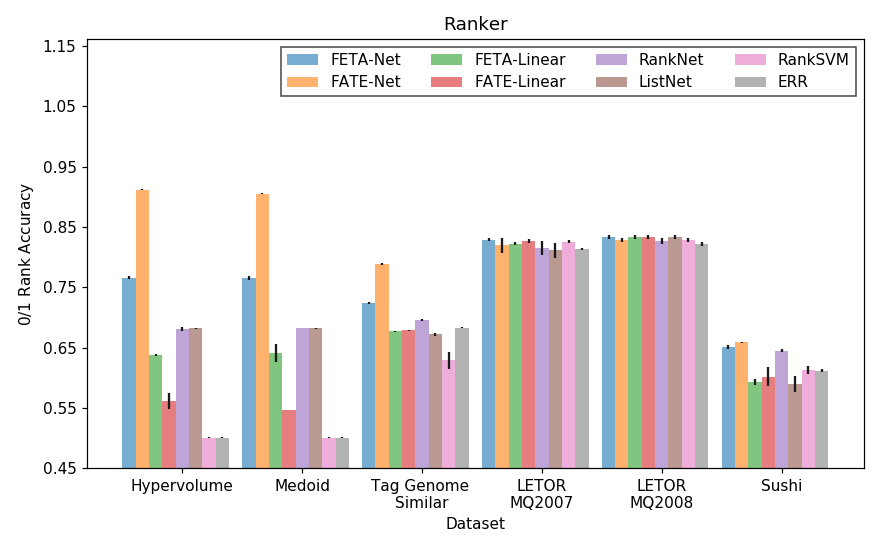

In [6]:
from csrank.constants import DISCRETE_CHOICE
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
sns.set(color_codes=True)
plt.style.use('default')
# create plot
extension = 'pdf'
fname = os.path.join(DIR_PATH, FOLDER, "{}_{}.{}")
start = start
ncols = 4
bar_plot_for_problem(df, learning_problem, start, ncols, fname, extension)

In [7]:
import copy
dataFrame = None
for dataset in datasets:
    df = create_final_result(dataset, latex_row=False)
    if dataFrame is None:
        dataFrame = copy.copy(df)
    else:
        dataFrame = dataFrame.append(df, ignore_index=True)
dataFrame.to_csv(df_path_combined)
dataFrame

,Dataset,Ranker,KendallsTau,SpearmanCorrelation,$0/1$ Rank Accuracy,ExpectedReciprocalRank,$0/1$ Accuracy,NDCGTopAll
0,Hypervolume,FATE-Net,0.824±0.001,0.879±0.001,0.912±0.001,0.088±0.001,0.486±0.003,0.949±0.002
1,Hypervolume,FETA-Net,0.532±0.005,0.601±0.004,0.766±0.002,0.234±0.002,0.159±0.005,0.851±0.002
2,Hypervolume,ListNet,0.364±0.001,0.416±0.001,0.682±0.001,0.318±0.001,0.087±0.001,0.778±0.001
3,Hypervolume,RankNet,0.361±0.005,0.413±0.007,0.681±0.003,0.319±0.003,0.088±0.001,0.777±0.002
4,Hypervolume,FETA-Linear,0.274±0.003,0.322±0.003,0.637±0.002,0.363±0.002,0.044±0.003,0.708±0.001
5,Hypervolume,FATE-Linear,0.135±0.001,0.154±0.001,0.562±0.013,0.441±0.019,0.012±0.000,0.620±0.001
6,Hypervolume,Random,0.001±0.002,0.001±0.003,0.500±0.001,0.500±0.001,0.009±0.000,0.590±0.001
7,Hypervolume,RankSVM,0.001±0.001,0.002±0.001,0.500±0.001,0.499±0.001,0.007±0.000,0.526±0.001
8,Hypervolume,ERR,0.000±0.002,0.000±0.002,0.500±0.001,0.500±0.001,0.008±0.001,0.525±0.001
9,Medoid,FATE-Net,0.811±0.002,0.867±0.002,0.906±0.001,0.094±0.001,0.466±0.005,0.940±0.001


In [8]:
import string
def get_val(val):
    vals =  [float(x) for x in re.findall(r"[-+]?\d*\.\d+|\d+", val)]
    if len(vals)==1:
        x = [vals[0], vals[0]-0.0]
    else:
        x = [vals[0], vals[0] - vals[1]*1e-3]
    return x
def mark_best(df):
    for col in list(df.columns)[1:]:
        values_str = df[[learning_model, col]].as_matrix()
        values = np.array([get_val(val[1])for val in values_str])
        maxi = np.where(values[:,0] == values[:,0][np.argmax(values[:,0])])[0]
        for ind in maxi:
            values_str[ind] = [values_str[ind][0], "bfseries {}".format(values_str[ind][1])]
        df[learning_model] = values_str[:,0]
        df[col] = values_str[:,1]
    return df

In [9]:
def create_latex(df):
    grouped = df.groupby(['Dataset'])
    code = ""
    for name, group in grouped:
        print("############################################################################")
        print("Dataset {}\n".format(name))
        code = code + "\n\t\tName {} \t\t\n\n".format(name)
        custom_dict = dict()
        for i, m in enumerate(OR_MODELS):
            custom_dict[m] = i
        group['rank'] = group[learning_model].map(custom_dict)
        group.sort_values(by='rank', inplace=True)
        del group["Dataset"]
        del group['rank']
        group = mark_best(group)
        group[learning_model].replace(to_replace=['FATE-Net'], value='fatenet',inplace=True)
        group[learning_model].replace(to_replace=['FETA-Net'], value='fetanet',inplace=True)
        group[learning_model].replace(to_replace=['RankNet'], value='ranknet',inplace=True)
        group[learning_model].replace(to_replace=['ERR'], value='err',inplace=True)
        group[learning_model].replace(to_replace=['FATE-Linear'], value='fatelinear',inplace=True)
        group[learning_model].replace(to_replace=['FETA-Linear'], value='fetalinear',inplace=True)
        group[learning_model].replace(to_replace=['RankSVM'], value='ranksvm',inplace=True)
        group[learning_model].replace(to_replace=['ListNet'], value='listnet',inplace=True)
        group[learning_model].replace(to_replace=['Random'], value='random',inplace=True)
        del group['ExpectedReciprocalRank']
        del group['KendallsTau']
        del group['NDCGTopAll']
        latex_code = group.to_latex(index = False)
        latex_code = latex_code.replace(' ',"")
        latex_code = latex_code.replace('&'," & ")
        latex_code = str(latex_code)
        for learner in group[learning_model]:
            latex_code = latex_code.replace(learner, "\\{}".format(learner))
        latex_code = latex_code.replace("bfseries", "\\{} ".format("bfseries"))
        latex_code = latex_code.replace("\\$", "$")
        latex_code = latex_code.replace("\\_", "_")
        code = code + latex_code
    return code
code = ""
for dataset in datasets:
    df = create_final_result(dataset, latex_row=True)
    df.sort_values(by='Dataset')
    code = code + create_latex(df)
f= open(latex_path,"w+")
f.write(code)
f.close()

############################################################################
Dataset Hypervolume

############################################################################
Dataset Medoid

############################################################################
Dataset Best Critique-Fit Movie d=+1

############################################################################
Dataset Best Critique-Fit Movie d=-1

############################################################################
Dataset Tag Genome Similar

############################################################################
Dataset LETOR MQ2007 10 Objects

############################################################################
Dataset LETOR MQ2007 5 Objects

############################################################################
Dataset LETOR MQ2008 10 Objects

############################################################################
Dataset LETOR MQ2008 5 Objects

####################################

In [10]:
"UNIQUE_MAX_OCCURRING".lower()

'unique_max_occurring'